**Assignment 6: Probabilistic Reasoning (Given: 11 Apr 2023, Due: 23 Apr 2023)**


**General instructions**

* Solutions are to be typed in the `.ipynb` file provided and uploaded in the lab course page in Moodle on the due date. 
* Your code should be well commented and should be compatible with python3. You may use `collections`, `csv`, `re`, `numpy`,`matplotlib`, `math` modules. No other libraries may be imported. You may find `Counter` in `collections` useful.
* For a random variable `X` and a value `x` in its range, the event `X=x` will also be denoted by just `x` if the random variable is clear from the context.

# Spam Filter using Naive Bayes Classifier

You are given a collection of SMS text messages in `sms.csv` as a tab separated CSV file. The first column of this file tells whether the message is a spam or not spam and the second column gives the message. Assume that this dataset is labelled correctly as spam or not spam. We  will use this dataset as the training data to build a spam filter. 

(a) Analyze the dataset and identify top ten spam words and top ten non-spam words  and their frequency counts. Make sure that you first remove articles ("a", "and", "the") and <=4 letter propositions ("for", "off", "in", "from" and so on).  

In [6]:
from collections import Counter
import csv
import re

spam_words,non_spam_words=[],[]

with open('sms.csv','r') as file:
    csv_reader=csv.reader(file,delimiter='\t')
    for row in csv_reader:
        if row[0]=='spam':
            spam_words.extend(re.sub("[^A-Z]","", row[1].lower(),0,re.IGNORECASE).split())
        else:
            non_spam_words.extend(re.sub("[^A-Z]","", row[1].lower(),0,re.IGNORECASE).split())

remove_words=["a","an","the",'as','at','by','in','of','on','to','up','bar','for','off','per','pro','via','amid','anti','atop','down','from','into','less','like','near','onto','over','past','plus','save','than','till','upon','eith']
for word in remove_words:
    try:
        spam_words.remove(word)
    except:
        pass

    try:
        non_spam_words.remove(word)
    except:
        pass

spam_words_dict=Counter(spam_words)
non_spam_words_dict=Counter(non_spam_words)
spam_words_len=len(spam_words)
non_spam_words_len=len(non_spam_words)

(b) Let `W` be the random variable denoting a word and `T` be the random variable denoting a message's type (spam or non-spam). For each of the words `w` (spam or non-spam), estimate the likelihood probabilities (aka the conditional probabilities) `Pr(W = w | T=spam)` and `Pr(W=w | T=non-spam)` as two separate functions. Note  that in order to compute these likelihoods this, you need to compute how many times `w` appears in the corpus (spam or not spam) and the total number of words (including duplicates) in that corpus. If a word does not occur at all, then assign it a non-zero yet small probability fixed suitably. Note that the likelihoods `Pr(w | spam)` and `Pr(w | non-spam)` have to be estimated after suitably removing articles and propositions as done in (a). 

In [7]:
def pr_word_spam(word,spam_words_dict,spam_words,spam_words_len,non_spam_words_len):
    if word.lower() in spam_words:
        return spam_words_dict[word.lower()]/spam_words_len
    return 1/(spam_words_len+non_spam_words_len)

def pr_word_nonspam(word,non_spam_words_dict,non_spam_words,spam_words_len,non_spam_words_len):
    if word.lower() in non_spam_words:
        return non_spam_words_dict[word.lower()]/non_spam_words_len
    return 1/(spam_words_len+non_spam_words_len)

(c) Let `M` be the random variable denoting a message (consisting of multiple words). Using the likelihood probabilities calculated in (b), implement a classifier that takes in a new SMS message `m=w1 w2 ... wi` and checks if it is spam or not using the naive Bayes' assumption. That is, compute `P(T=spam | M=m)` and `P(T=non-spam | M=m)` assuming that `P(m | spam) = P(w1 | spam) x P(w2 | spam) x ... x P(wi | spam)` and use this computation to decide if `m` is spam or not. 

In [8]:
def spam_classifier(message,spam_words_dict,spam_words,spam_words_len,non_spam_words_dict,non_spam_words,non_spam_words_len):
    pr_msg_spam,pr_msg_non_spam=1,1
    words=message.lower().split()
    for word in words:
        pr_msg_spam*=pr_word_spam(word,spam_words_dict,spam_words,spam_words_len,non_spam_words_len)
        pr_msg_non_spam*=pr_word_nonspam(word,non_spam_words_dict,non_spam_words,spam_words_len,non_spam_words_len)

    pr_spam=spam_words_len/(spam_words_len+non_spam_words_len)
    
    if pr_spam*pr_msg_spam>(1-pr_spam)*pr_msg_non_spam:
        return True     #return True if spam and False if non_spam
    return False

(d) Test your classifier against 4-5 SMS messages (spam as well as non-spam) that you have received in your mobile phone.

In [9]:
messages=["Dear Customer, Small savings can make a BIG impact! Invest in Axis Bank FD and get up to 7.15% assured interest for 1 year+. Book now! Axbk.in/XB7QRCCXX0w T&C",
"Dear Customer, registration for Google Pay has started for ICICI Bank. If it was not you, report to your bank. Do not share card details/OTP/CVV with anyone.",
"My friend's band... Like share etc...",
"Remove if possible, they're certainly not for making the code more understandable"]

for message in messages:
    if spam_classifier(message,spam_words_dict,spam_words,spam_words_len,non_spam_words_dict,non_spam_words,non_spam_words_len):
        print("spam")
    else:
        print("not spam")

not spam
not spam
not spam
not spam


# Binary Town Naive Bayes Classifier  

Consider a town that contains only kids and adults. Each person in this town is associated with two attributes, height and weight that take on values from $\mathbb{R}$. Assume that the attributes height and weight are conditionally independent given the category (adult or kid). Let $X$ be the random variable denoting a pair of height-weight values and $Y$ be the random variable denoting a person in this town. Let $X_1$ and $X_2$ denote the random variables that take as values $x_1$ and $x_2$ when $X=(x_1,x_2)$.  Assume that $Y$ is a binary random variable that takes on values $kid=0$ or $adult=1$ depending on whether the person is a kid or an adult. The probability that a random person in this town is a kid is given by $P(Y=kid)=pKid$ and the probability that a random person in this town is an adult is given by $P(Y=adult)=pAdult=1-pKid$.

The conditional probability of height and weight given that a person is a kid or adult is given as follows. For $x=(x_1,x_2) \in \mathbb{R}^2$ with $x_1$ denoting the height and $x_2$ denoting the weight,

*   $P(X_1=x_1 ~|~ Y=kid)=f_{\mu_{11},\sigma_{11}}(x_1)$ and $P(X_2=x_2 ~|~ Y=kid)=f_{\mu_{12},\sigma_{12}}(x_2)$
*   $P(X_1=x_1 ~|~ Y=adult)=f_{\mu_{21},\sigma_{21}}(x_1)$ and $P(X_2=x_2 ~|~ Y=adult)=f_{\mu_{22},\sigma_{22}}(x_2)$
 
where $f_{\mu,\sigma}(z)=\frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{1}{2} \left( \frac{z-\mu}{\sigma} \right)^2}$. As height and weight are conditionally independent given the category, it follows that $P(X=x ~|~ Y=kid)=f_{\mu_{11},\sigma_{11}}(x_1) f_{\mu_{12},\sigma_{12}}(x_2)$ and $P(X=x ~|~ Y=adult)=f_{\mu_{21},\sigma_{21}}(x_1) f_{\mu_{22},\sigma_{22}}(x_2)$.


(a) Simulate 1000 people in this town assuming $pKid=.3$, $\sigma_{11}=\sigma_{21}=1$, $\sigma_{12}=\sigma_{22}=10$, $\mu_{11}=2.7,\mu_{12}=20,\mu_{21}=5,\mu_{22}=43$. Note that you may have to discard a  sample $(x_1,x_2)$ if either $x_1 <0$ or $x_2 <0$. Plot the bar chart of the valid samples, the histogram of heights across the groups, the histogram of weights across the groups and the scatter plot of the samples (height in the X-axis and weight in the Y-axis). 

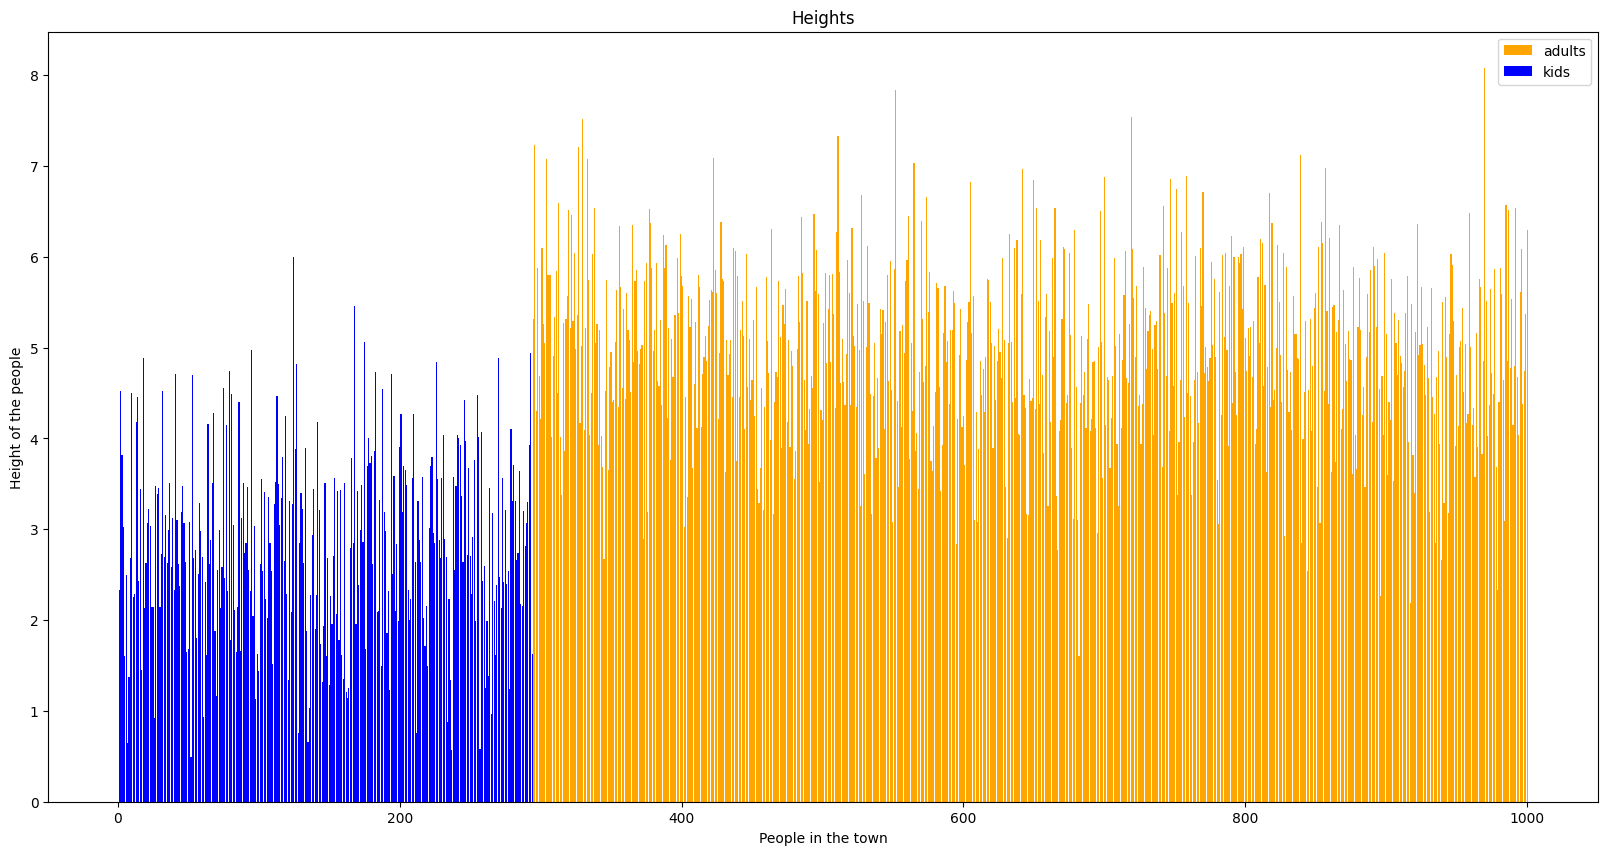

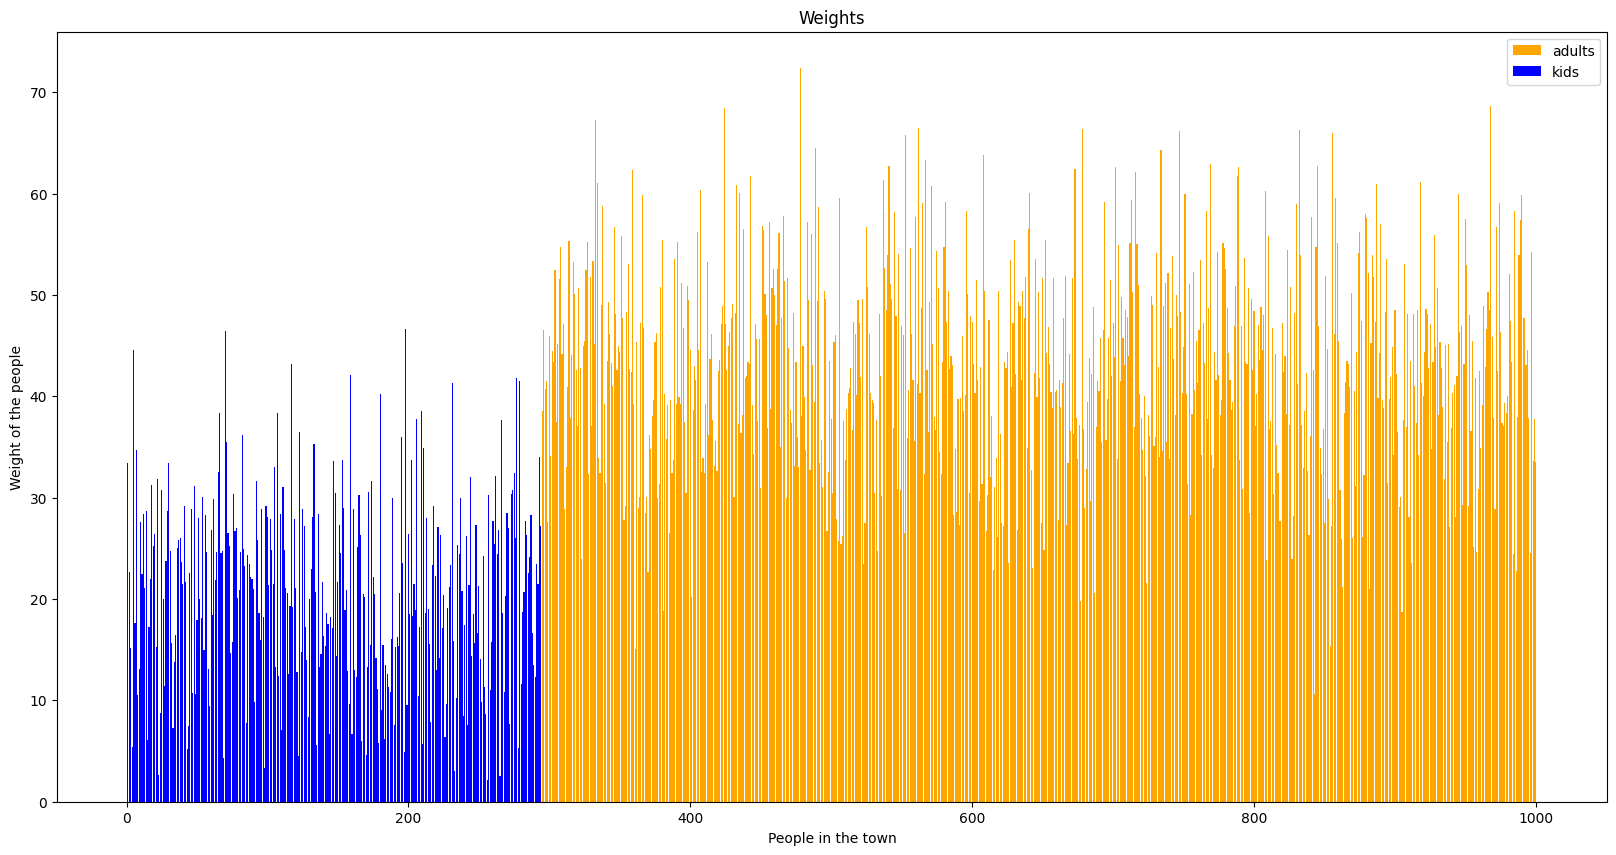

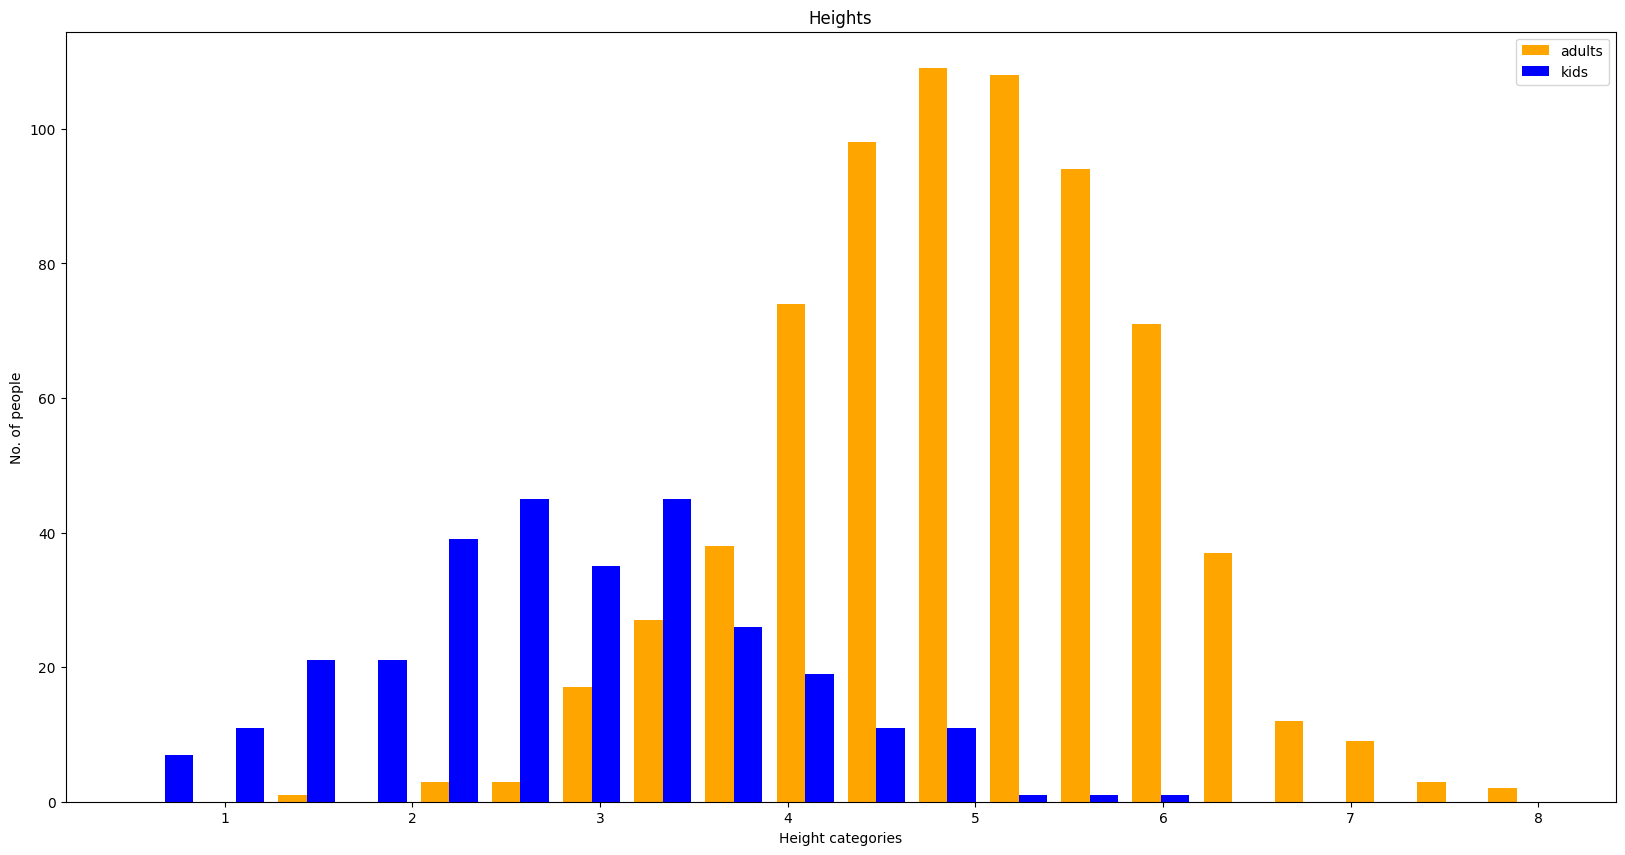

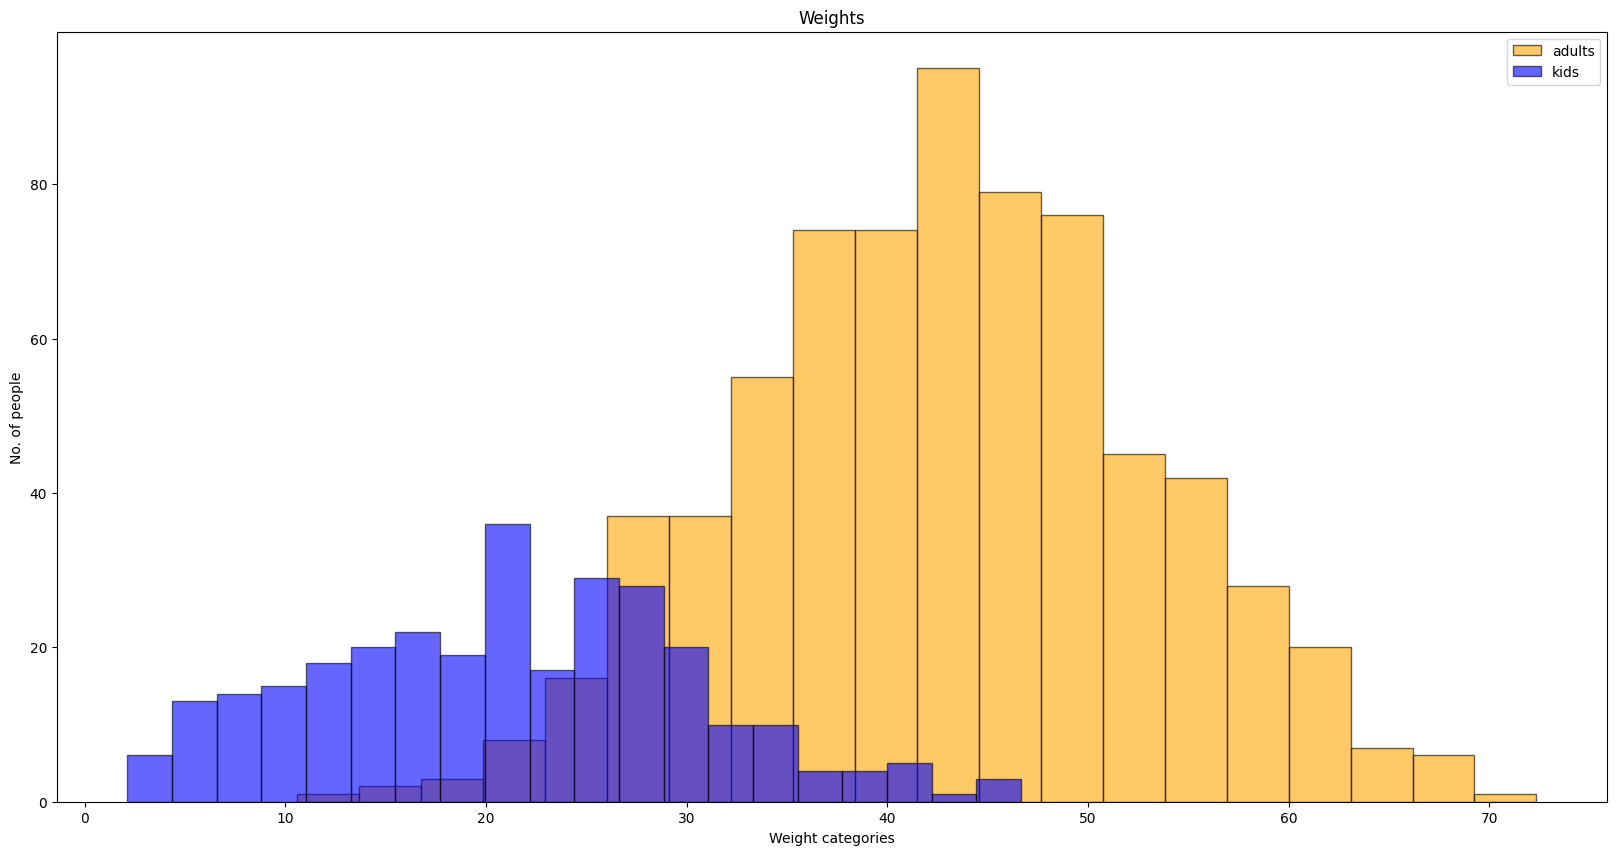

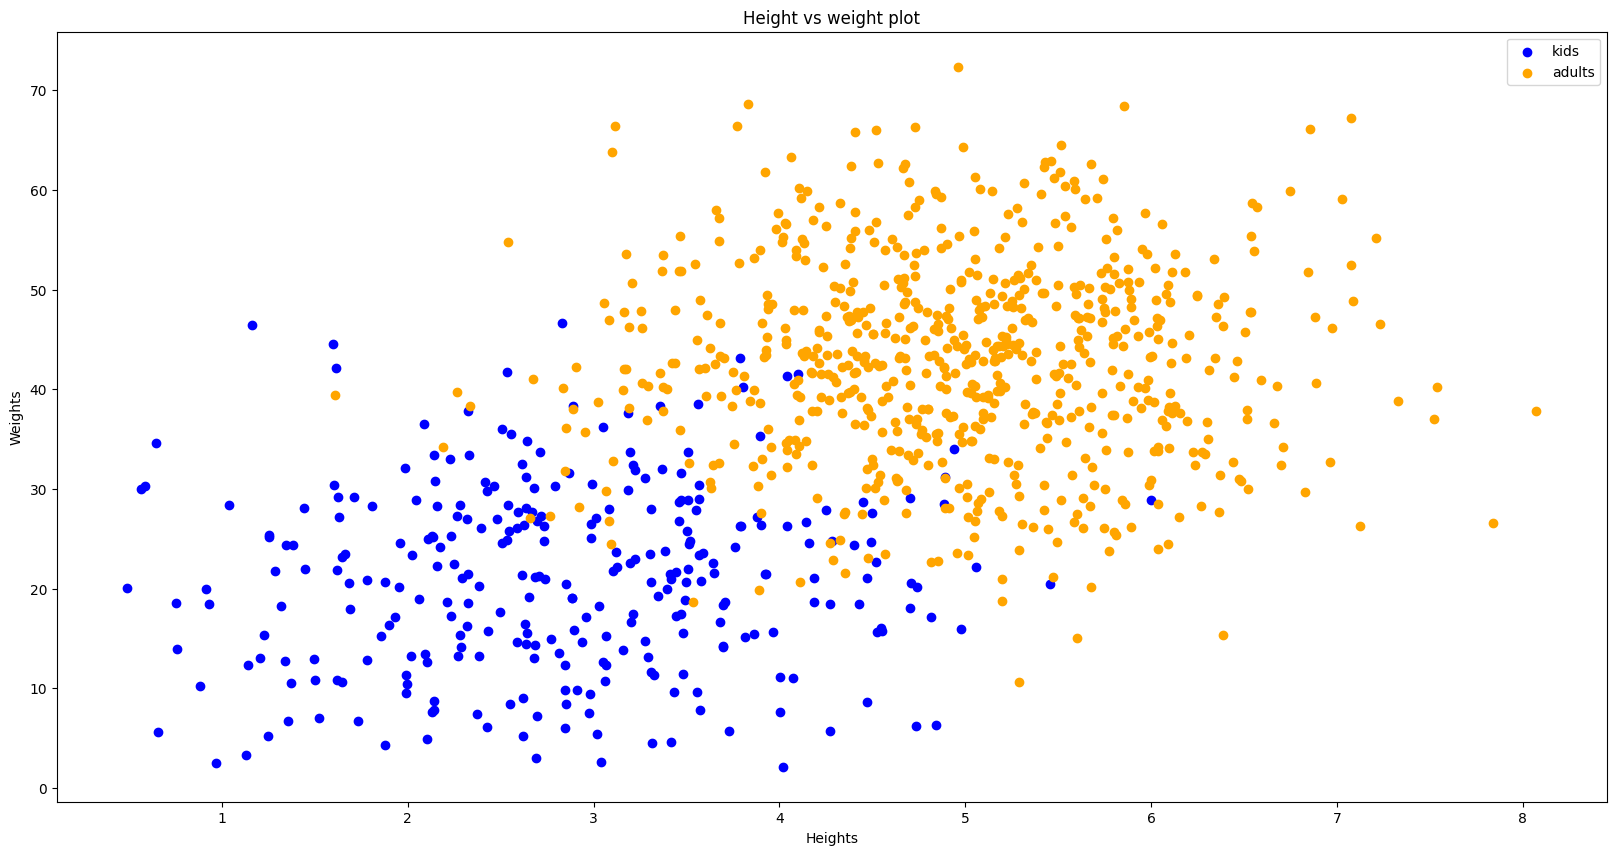

In [1]:
import random
from matplotlib import pyplot as plt
import numpy as np

p_kid=0.3
sigma11,sigma21,sigma12,sigma22=1,1,10,10
mu11,mu21,mu12,mu22=2.7,5,20,43

x_data_kids,x_data_adults=[],[]
y_data_adults,y_data_kids=[],[]

i=0
while(i<1000):
    if random.random()<p_kid:
        height=np.random.normal(mu11,sigma11)
        weight=np.random.normal(mu12,sigma12)
        if height<0 or weight<0:
            continue
        else:
            x_data_kids.append(height)
            y_data_kids.append(weight)
    else:
        height=np.random.normal(mu21,sigma21)
        weight=np.random.normal(mu22,sigma22)
        if height<0 or weight<0:
            continue
        else:
            x_data_adults.append(height)
            y_data_adults.append(weight)
    i+=1
    
plt.figure(figsize=(20,10))
plt.bar(range(len(x_data_kids)+1,1001),x_data_adults,color="orange",label='adults')
plt.bar(range(1,len(x_data_kids)+1),x_data_kids,color="blue",label='kids')
plt.xlabel("People in the town")
plt.ylabel("Height of the people")
plt.title("Heights")
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.bar(range(len(x_data_kids)+1,1001),y_data_adults,color="orange",label='adults')
plt.bar(range(1,len(x_data_kids)+1),y_data_kids,color="blue",label='kids')
plt.xlabel("People in the town")
plt.ylabel("Weight of the people")
plt.title("Weights")
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.hist([x_data_adults,x_data_kids],bins=20,color=["orange","blue"],label=['adults',"kids"])
# plt.hist(x_data_kids,bins=20,color="blue",label='kids',alpha=0.6,edgecolor='black')
plt.xlabel("Height categories")
plt.ylabel("No. of people")
plt.title("Heights")
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.hist(y_data_adults,bins=20,color="orange",label='adults',alpha=0.6,edgecolor='black')
plt.hist(y_data_kids,bins=20,color="blue",label='kids',alpha=0.6,edgecolor='black')
plt.xlabel("Weight categories")
plt.ylabel("No. of people")
plt.title("Weights")
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.scatter(x_data_kids,y_data_kids,c="blue",label='kids')
plt.scatter(x_data_adults,y_data_adults,c="orange",label='adults')
plt.legend()
plt.title("Height vs weight plot")
plt.xlabel("Heights")
plt.ylabel("Weights")
plt.show()

(b) Implement an agent that observes the 1000 samples generated in part (a) and computes the fraction $pK$ of kids. Observe that $pK$ is an estimate on $pKid$. Compute the mean and standard deviation of heights and weights for samples that are kids. These values $\mu'_{11},\sigma'_{11},\mu'_{12}$ and $\sigma'_{12}$ are the estimates for $\mu_{11},\sigma_{11},\mu_{12}$ and $\sigma_{12}$. Compute similar estimates $\mu'_{21},\sigma'_{21},\mu'_{22}$ and $\sigma'_{22}$ for $\mu_{21},\sigma_{21},\mu_{22}$ and $\sigma_{22}$.



In [4]:
pK=len(x_data_kids)/1000

sigma_11,sigma_21,sigma_12,sigma_22=np.std(x_data_kids),np.std(x_data_adults),np.std(y_data_kids),np.std(y_data_adults)
mu_11,mu_21,mu_12,mu_22=np.mean(x_data_kids),np.mean(x_data_adults),np.mean(y_data_kids),np.mean(y_data_adults)

print(pK)

0.287


(c) Implement an agent that classifies each sample generated in part (a) as kid or adult using the estimates computed in part (b) and Bayes' Rule. That is, the classification of a person with attributes $x=(x_1,x_2)$ into $adult$ or $kid$ is based on the values $pK \cdot f_{\mu'_{11},\sigma'_{11}}(x_1) f_{\mu'_{12},\sigma'_{12}}(x_2)$ and $(1-pK) \cdot f_{\mu'_{21},\sigma'_{21}}(x_1) f_{\mu'_{22},\sigma'_{22}}(x_2)$. Measure the accuracy of the classifier. Give the scatter plot of the 1000 samples (height in the X-axis and weight in the Y-axis) by coloring the correctly classified ones in one color and the others in another color. 





accuracy of classifier is: 0.958041958041958


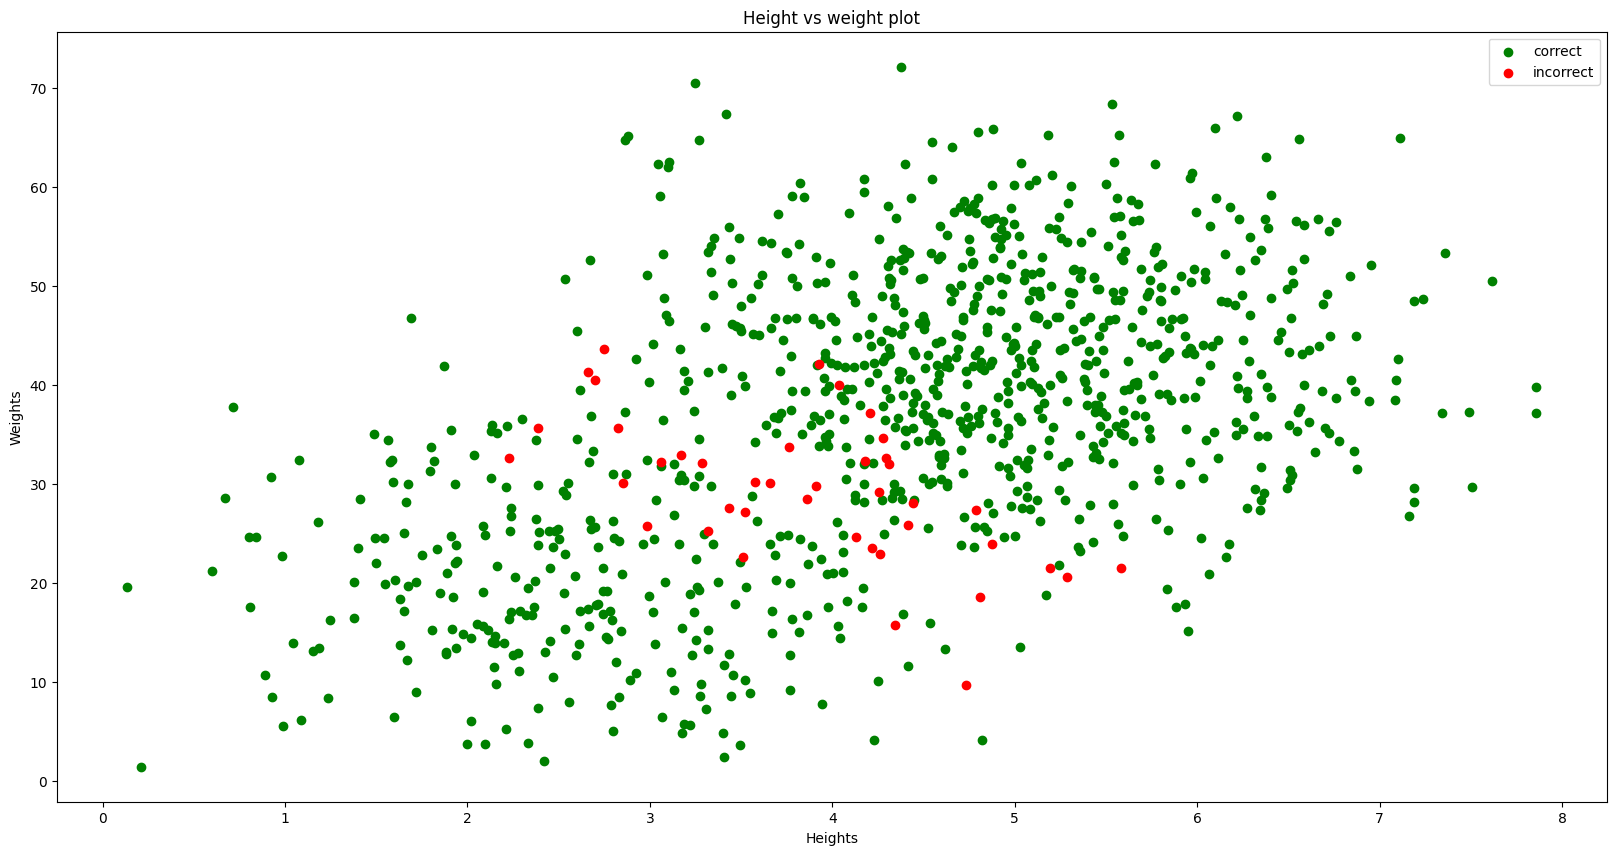

In [5]:
def pdf(x , mean , sd):
    prob_density = (1/(((2*np.pi)**0.5)*sd)) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

x_correct,y_correct,x_incorrect,y_incorrect=[],[],[],[]
num_correct=0
for i in range(len(x_data_kids)):
    if p_kid*pdf(x_data_kids[i],mu_11,sigma_11)*pdf(y_data_kids[i],mu_12,sigma_12)>(1-p_kid)*pdf(x_data_kids[i],mu_21,sigma_21)*pdf(y_data_kids[i],mu_22,sigma_22):
        num_correct+=1
        x_correct.append(x_data_kids[i])
        y_correct.append(y_data_kids[i])
        
    else:
        x_incorrect.append(x_data_kids[i])
        y_incorrect.append(y_data_kids[i])
        
for i in range(len(x_data_adults)):
    if (1-p_kid)*pdf(x_data_adults[i],mu_21,sigma_21)*pdf(y_data_adults[i],mu_22,sigma_22)>p_kid*pdf(x_data_adults[i],mu_11,sigma_11)*pdf(y_data_adults[i],mu_12,sigma_12):
        num_correct+=1
        x_correct.append(x_data_adults[i])
        y_correct.append(y_data_adults[i])
        
    else:
        x_incorrect.append(x_data_adults[i])
        y_incorrect.append(y_data_adults[i])
        
print(f"accuracy of classifier is: {num_correct/1001}")

plt.figure(figsize=(20,10))
plt.scatter(x_correct,y_correct,c="green",label='correct')
plt.scatter(x_incorrect,y_incorrect,c="red",label='incorrect')
plt.legend()
plt.title("Height vs weight plot")
plt.xlabel("Heights")
plt.ylabel("Weights")
plt.show()

# Inferences from Bayes Net (Optional/Bonus)

In this assignment, we will consider Bayes nets that represent only Boolean variables. Given a text file containing the description of a Bayes net and another text file containing queries on the Bayes net, write a program that will answer these queries. You have to implement two techniques for drawing inference from a Bayes net.


*   Exact inference using variable elimination - implement the following functions (i) reduce – retains only those entries in the factor that support the evidences (ii) join – joins two factors (iii) sum– sums out a variable from the factor (iv) normalize – normalizes the factor
* Approximate inference using rejection sampling - write a function that selects the value for a variable from a given probability distribution.

**Description of a Bayes net** - given as a text file in the following format.

$N$

$X_1$ parents of $X_1$ separated by space

Conditional probability table

$X_2$ parents of $X_2$ separated by space

Conditional probability table

...

The first line indicates the number of random variables in the network. Every pair of subsequent consecutive lines give details about a variable, its parents and the conditional probability table. Consider the following example of an input file. 

3

1 2

0.8 0.2

0.4 0.6

3

0.2 0.8

2

0.6 0.4


Here, the first line says that there are three random variables in the network. The second line says that the random variable $X_1$ has a single parent $X_2$. The third line says that P($X_1$=true | $X_2$=true) = 0.8 and P($X_1$=false | $X_2$=true) = 0.2. The fourth line says that P($X_1$=true | $X_2$=false) = 0.4 and P($X_1$=false | $X_2$=false) = 0.6. The next two line say that the random variable $X_3$ has no parents and P($X_3$=true) = 0.2, P($X_3$=false) = 0.8. The next two lines say that the random variable $X_2$ has no parents, P($X_2$=true) = 0.6, P($X_2$=false) = 0.4. 

**Description of the Queries** - given as a text file with each line in the following format

`technique` `q` `query variables` `e` `evidence variables` 

where the query/evidence variables are separated by space. For example, if we want to use `variable elimination` to estimate P($X_1$=true,$X_2$=true | $X_3$=false), then the query line is
`ve q 1 2 e ~3`. Similarly, if we want to perform the same inference using rejection sampling, then the query is `rs q 1 2 e ~3`. Here, `~` denotes negation. 

**Output** - the output to the queries should be provided in a separate file. For simplicity, assume that in each query, we are only interested in obtaining the probability values instead of the distribution. That is, the output is a probability value, one per line, for every query.

Also, investigate the convergence of the probabilities estimated from rejection sampling as a function of the number of  samples generated.  